# Description

Make plots to show the computational complexity results comparing all coefficients.

# Modules loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from clustermatch import conf

# Settings

In [2]:
INPUT_FILENAME_TEMPLATE = "time_test"

# Paths

In [3]:
assert (
    conf.MANUSCRIPT["BASE_DIR"] is not None and conf.MANUSCRIPT["BASE_DIR"].exists()
), "Manuscript dir not set"

In [4]:
OUTPUT_FIGURE_DIR = conf.MANUSCRIPT["FIGURES_DIR"] / "coefs_comp" / "time_test"
OUTPUT_FIGURE_DIR.mkdir(parents=True, exist_ok=True)
display(OUTPUT_FIGURE_DIR)

PosixPath('/opt/manuscript/content/images/coefs_comp/time_test')

In [5]:
INPUT_DIR = conf.RESULTS_DIR / "time_test"
display(INPUT_DIR)

PosixPath('/opt/data/results/time_test')

# Load results

In [6]:
time_results = pd.read_pickle(INPUT_DIR / f"{INPUT_FILENAME_TEMPLATE}.pkl")

In [7]:
time_results.shape

(10600, 4)

In [8]:
time_results.head()

,data_size,method,time,sim
0,100,p-1,0.000177,-0.115117
1,100,p-1,0.000096,-0.050567
2,100,p-1,0.000089,0.215785
3,100,p-1,0.000078,0.020045
4,100,p-1,0.000075,0.053343


In [9]:
time_results["method"].unique()

array(['p-1', 's-1', 'cm-1', 'mic_e-1', 'mic-1', 'p-3', 's-3', 'cm-3',
       'mic_e-3', 'mic-3'], dtype=object)

# Processing

In [10]:
time_results = time_results.replace(
    {
        "method": {
            "p-1": "Pearson (1 core)",
            "s-1": "Spearman (1 core)",
            "cm-1": "CCC (1 core)",
            "mic-1": "MIC (1 core)",
            "mic_e-1": "MICe (1 core)",
            "p-3": "Pearson (3 cores)",
            "s-3": "Spearman (3 cores)",
            "cm-3": "CCC (3 cores)",
            "mic-3": "MIC (3 cores)",
            "mic_e-3": "MICe (3 cores)",
        }
    }
)

In [11]:
time_results.shape

(10600, 4)

In [12]:
time_results.head()

,data_size,method,time,sim
0,100,Pearson (1 core),0.000177,-0.115117
1,100,Pearson (1 core),0.000096,-0.050567
2,100,Pearson (1 core),0.000089,0.215785
3,100,Pearson (1 core),0.000078,0.020045
4,100,Pearson (1 core),0.000075,0.053343


# Run numbers

In [13]:
plot_data = time_results

In [14]:
run_numbers = (
    plot_data[
        plot_data["method"].str.contains("1 core", regex=False)
        | plot_data["method"].str.contains("CCC (3 cores)", regex=False)
    ]
    .groupby(["data_size", "method"])["time"]
    .describe()
)
display(run_numbers)

count       mean       std        min  \
data_size method                                                      
100       CCC (1 core)       1000.0   0.003231  0.000197   0.002865   
          CCC (3 cores)      1000.0   0.002883  0.000247   0.002668   
          MIC (1 core)       1000.0   0.001581  0.000077   0.001359   
          MICe (1 core)      1000.0   0.001499  0.000066   0.001318   
          Pearson (1 core)   1000.0   0.000074  0.000011   0.000070   
          Spearman (1 core)  1000.0   0.000494  0.000032   0.000479   
500       CCC (1 core)         10.0   0.006589  0.000180   0.006302   
          CCC (3 cores)        10.0   0.004248  0.000548   0.003514   
          MIC (1 core)         10.0   0.025197  0.000473   0.024591   
          MICe (1 core)        10.0   0.020957  0.000297   0.020407   
          Pearson (1 core)     10.0   0.000086  0.000017   0.000076   
          Spearman (1 core)    10.0   0.000593  0.000038   0.000574   
1000      CCC (1 core)         10.0   0.011690  0.000369   0.011288   
          CCC (3 cores)        10.0   0.005821  0.000453   0.005463   
          MIC (1 core)         10.0   0.078974  0.000911   0.077212   
          MICe (1 core)        10.0   0.059360  0.000462   0.058623   
          Pearson (1 core)     10.0   0.000084  0.000008   0.000080   
          Spearman (1 core)    10.0   0.000664  0.000020   0.000653   
5000      CCC (1 core)         10.0   0.048023  0.000837   0.047308   
          CCC (3 cores)        10.0   0.021543  0.000691   0.020875   
          MIC (1 core)         10.0   1.124038  0.004541   1.117191   
          MICe (1 core)        10.0   0.555641  0.001436   0.553521   
          Pearson (1 core)     10.0   0.000107  0.000008   0.000103   
          Spearman (1 core)    10.0   0.001300  0.000021   0.001280   
10000     CCC (1 core)         10.0   0.095480  0.000823   0.094737   
          CCC (3 cores)        10.0   0.040703  0.000321   0.040158   
          MIC (1 core)         10.0   5.042935  0.012380   5.014734   
          MICe (1 core)        10.0   1.395035  0.002338   1.391148   
          Pearson (1 core)     10.0   0.000134  0.000010   0.000129   
          Spearman (1 core)    10.0   0.002233  0.000035   0.002184   
50000     CCC (1 core)         10.0   0.506397  0.002459   0.503453   
          CCC (3 cores)        10.0   0.211346  0.001107   0.210140   
          MICe (1 core)        10.0  11.928481  0.035568  11.894316   
          Pearson (1 core)     10.0   0.000453  0.000228   0.000360   
          Spearman (1 core)    10.0   0.012361  0.000286   0.011905   
100000    CCC (1 core)         10.0   1.057679  0.010312   1.049425   
          CCC (3 cores)        10.0   0.443641  0.005619   0.438929   
          Pearson (1 core)     10.0   0.000772  0.000186   0.000697   
          Spearman (1 core)    10.0   0.026782  0.000256   0.026476   
1000000   CCC (1 core)         10.0  13.264790  0.053575  13.194549   
          CCC (3 cores)        10.0   6.345232  0.045706   6.274803   
          Pearson (1 core)     10.0   0.013408  0.000969   0.012498   
          Spearman (1 core)    10.0   0.379020  0.002932   0.373437   

                                   25%        50%        75%        max  
data_size method                                                         
100       CCC (1 core)        0.003123   0.003199   0.003332   0.006627  
          CCC (3 cores)       0.002787   0.002853   0.002935   0.008305  
          MIC (1 core)        0.001534   0.001574   0.001622   0.002155  
          MICe (1 core)       0.001456   0.001495   0.001535   0.001828  
          Pearson (1 core)    0.000071   0.000072   0.000072   0.000177  
          Spearman (1 core)   0.000484   0.000486   0.000490   0.001001  
500       CCC (1 core)        0.006444   0.006611   0.006731   0.006809  
          CCC (3 cores)       0.003892   0.004152   0.004506   0.005321  
          MIC (1 core)        0.024858   0.025222   0.025401   0.026221  
          MICe (1 co

# Plot

In [15]:
hue_order = sorted(time_results["method"].unique())

In [16]:
hue_order

['CCC (1 core)',
 'CCC (3 cores)',
 'MIC (1 core)',
 'MIC (3 cores)',
 'MICe (1 core)',
 'MICe (3 cores)',
 'Pearson (1 core)',
 'Pearson (3 cores)',
 'Spearman (1 core)',
 'Spearman (3 cores)']

In [17]:
deep_colors = sns.color_palette("deep")
display(deep_colors)

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [18]:
def format_data_size(x):
    if x < 1000:
        return f"{int(x)}"
    elif x < 1000000:
        return f"{int(x/1000)}k"

    return f"{int(x/1000000)}m"


plot_data = plot_data.assign(data_size=plot_data["data_size"].apply(format_data_size))

## First analysis

Here I take a look if using more than 1 core benefits methods.

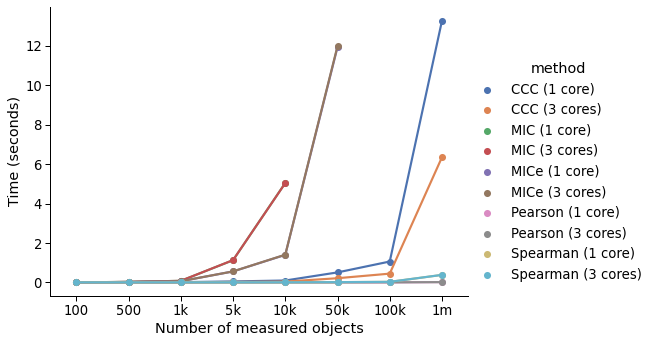

In [19]:
with sns.plotting_context("paper", font_scale=1.5):
    g = sns.catplot(
        kind="point",
        data=plot_data,
        x="data_size",
        y="time",
        hue="method",
        hue_order=hue_order,
        palette=deep_colors,
        height=5,
        aspect=1.4,
    )

    plt.xlabel("Number of measured objects")
    plt.ylabel("Time (seconds)")

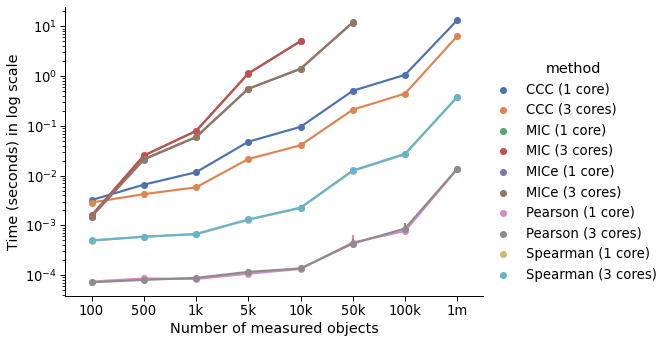

In [20]:
with sns.plotting_context("paper", font_scale=1.5):
    g = sns.catplot(
        kind="point",
        data=plot_data,
        x="data_size",
        y="time",
        hue="method",
        hue_order=hue_order,
        palette=deep_colors,
        height=5,
        aspect=1.4,
    )

    plt.xlabel("Number of measured objects")
    plt.ylabel("Time (seconds) in log scale")

    g.ax.set_yscale("log")

Only CCC is really taking advantage of more than 1 core, so I'll remove the rest below.

# Final analysis

In [21]:
# select runs with 3 cores for the other methods
plot_data = plot_data.replace(
    {
        "method": {
            "Pearson (3 cores)": "Pearson",
            "Spearman (3 cores)": "Spearman",
            "MIC (3 cores)": "MIC",
            "MICe (3 cores)": r"$\mathregular{MIC_e}$",
        }
    }
)

In [22]:
plot_data["method"].unique()

array(['Pearson (1 core)', 'Spearman (1 core)', 'CCC (1 core)',
       'MICe (1 core)', 'MIC (1 core)', 'Pearson', 'Spearman',
       'CCC (3 cores)', '$\\mathregular{MIC_e}$', 'MIC'], dtype=object)

In [23]:
hue_order = [
    "MIC",
    r"$\mathregular{MIC_e}$",
    "CCC (1 core)",
    "CCC (3 cores)",
    "Spearman",
    "Pearson",
]

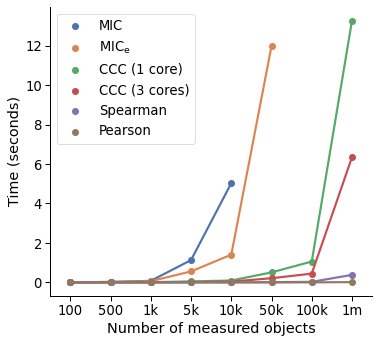

In [24]:
with sns.plotting_context("paper", font_scale=1.5):
    g = sns.catplot(
        kind="point",
        data=plot_data,
        x="data_size",
        y="time",
        hue="method",
        hue_order=hue_order,
        palette=deep_colors,
        height=5,
        aspect=1.1,
        legend=False,
    )

    plt.legend(loc="best")
    plt.xlabel("Number of measured objects")
    plt.ylabel("Time (seconds)")

    plt.savefig(
        OUTPUT_FIGURE_DIR / f"{INPUT_FILENAME_TEMPLATE}.svg",
        bbox_inches="tight",
        facecolor="white",
    )

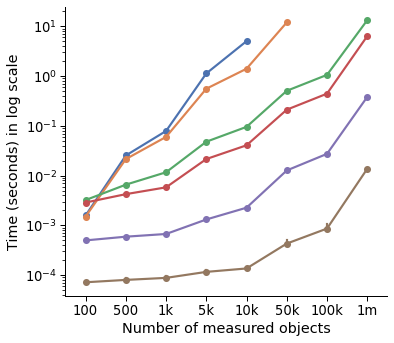

In [25]:
with sns.plotting_context("paper", font_scale=1.5):
    g = sns.catplot(
        kind="point",
        data=plot_data,
        x="data_size",
        y="time",
        hue="method",
        hue_order=hue_order,
        palette=deep_colors,
        height=5,
        aspect=1.1,
        legend=False,
    )

    plt.xlabel("Number of measured objects")
    plt.ylabel("Time (seconds) in log scale")
    g.ax.set_yscale("log")

    plt.savefig(
        OUTPUT_FIGURE_DIR / f"{INPUT_FILENAME_TEMPLATE}-log.svg",
        bbox_inches="tight",
        facecolor="white",
    )

# Create final figure

In [26]:
from svgutils.compose import Figure, SVG

In [27]:
Figure(
    "396.75125cm",
    "170.93350cm",
    SVG(OUTPUT_FIGURE_DIR / "time_test.svg").scale(0.5),
    SVG(OUTPUT_FIGURE_DIR / "time_test-log.svg").scale(0.5).move(200, 0),
).save(OUTPUT_FIGURE_DIR / "time_test-main.svg")

**Now open the file**, reside to fit drawing to page, and add a white rectangle to the background.